nn.Module을 활용하여 모델 클래스를 만들어봅시다. 

이전 강의 코드에서 모델부분만 변경해봅시다

In [27]:
import pandas as pd
import torch
from torch import nn

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Teaching/DL 202301/HousingData.csv')

In [29]:
df = df.dropna()  

In [30]:
x_df = df.iloc[:,:-1]
y_df = df.iloc[:,-1]

In [31]:
x = torch.from_numpy(x_df.values).float()
y = torch.from_numpy(y_df.values).float()

nn.Module을 subclassing하여 만들어줍니다. 

```
model = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(), 
    nn.Linear(64, 1)
)
```

In [32]:
class DNN(nn.Module): # nn.Module subclassing

  def __init__(self):
    super().__init__() # base class 초기화
    self.fc1 = nn.Linear(13, 64) # 레이어 인스턴스 만들기
    self.relu = nn.ReLU() 
    self.fc2 = nn.Linear(64,1)

  def forward(self, x): # 데이터 입력 받을수 있게 변수 추가
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x


In [33]:
model = DNN() # 인스턴스 만들기

In [34]:
model(x[:10])

tensor([[-30.7306],
        [-27.6205],
        [-26.9254],
        [-24.2016],
        [-24.6003],
        [-35.0715],
        [-35.7887],
        [-35.0984],
        [-34.4080],
        [-33.4927]], grad_fn=<AddmmBackward0>)

In [35]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
epochs = 1000
batch_size = 10

In [37]:
for epoch in range(epochs):
  running_loss = 0 # 전체 데이터셋에 대한 loss 계산

  # 데이터를 batch로 나누어서 학습
  for i in range(0, x.shape[0], batch_size): #range(start, end, step), end는 미포함
    inputs = x[i:i+batch_size]
    labels = y[i:i+batch_size]

    optimizer.zero_grad() # gradient 초기화
    outputs = model(inputs) # 모델값 예측
    #print(outputs)
    loss = loss_fn(outputs, labels.unsqueeze(dim=1)) # 에러 계산
    loss.backward() # gradient 계산
    optimizer.step() # gradient 업데이트

    running_loss += loss.item() * batch_size

  if (epoch+1)%10==0:   
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, running_loss / x.shape[0]))


Epoch [10/1000], Loss: 66.8318
Epoch [20/1000], Loss: 62.7006
Epoch [30/1000], Loss: 57.4333
Epoch [40/1000], Loss: 53.1774
Epoch [50/1000], Loss: 49.9884
Epoch [60/1000], Loss: 47.2095
Epoch [70/1000], Loss: 44.5346
Epoch [80/1000], Loss: 42.2459
Epoch [90/1000], Loss: 40.6418
Epoch [100/1000], Loss: 38.8791
Epoch [110/1000], Loss: 36.7928
Epoch [120/1000], Loss: 34.9643
Epoch [130/1000], Loss: 33.2720
Epoch [140/1000], Loss: 31.5014
Epoch [150/1000], Loss: 29.7234
Epoch [160/1000], Loss: 28.3568
Epoch [170/1000], Loss: 27.1619
Epoch [180/1000], Loss: 26.0821
Epoch [190/1000], Loss: 24.8278
Epoch [200/1000], Loss: 23.0715
Epoch [210/1000], Loss: 22.9462
Epoch [220/1000], Loss: 22.6399
Epoch [230/1000], Loss: 20.8973
Epoch [240/1000], Loss: 23.0328
Epoch [250/1000], Loss: 19.5437
Epoch [260/1000], Loss: 19.4552
Epoch [270/1000], Loss: 22.3800
Epoch [280/1000], Loss: 18.5094
Epoch [290/1000], Loss: 18.0557
Epoch [300/1000], Loss: 18.6311
Epoch [310/1000], Loss: 18.0838
Epoch [320/1000],

class 내부에 sequential 모델을 사용할 수도 있습니다. 

In [38]:
class DNN2(nn.Module): # nn.Module subclassing

  def __init__(self):
    super().__init__() # base class 초기화
    self.linear_stack = nn.Sequential(
      nn.Linear(13, 64),
      nn.ReLU(), 
      nn.Linear(64,1)
    )

  def forward(self, x): # 데이터 입력 받을수 있게 변수 추가
    x = self.linear_stack(x)
    return x


In [39]:
model2 = DNN2()

In [40]:
model(x[:10])

tensor([[30.8616],
        [20.1533],
        [28.7978],
        [33.1596],
        [26.6731],
        [17.4952],
        [12.8971],
        [17.3215],
        [19.3625],
        [20.9215]], grad_fn=<AddmmBackward0>)

In [41]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

epochs = 1000
batch_size = 10

losses = []
for epoch in range(epochs):
  running_loss = 0 # 전체 데이터셋에 대한 loss 계산

  # 데이터를 batch로 나누어서 학습
  for i in range(0, x.shape[0], batch_size): #range(start, end, step), end는 미포함
    inputs = x[i:i+batch_size]
    labels = y[i:i+batch_size]

    optimizer.zero_grad() # gradient 초기화
    outputs = model2(inputs) # 모델값 예측
    #print(outputs)
    loss = loss_fn(outputs, labels.unsqueeze(dim=1)) # 에러 계산
    loss.backward() # gradient 계산
    optimizer.step() # gradient 업데이트

    running_loss += loss.item() * batch_size

  losses.append(loss.item())
  if (epoch+1)%10==0:   
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, running_loss / x.shape[0]))

Epoch [10/1000], Loss: 83.2868
Epoch [20/1000], Loss: 80.9916
Epoch [30/1000], Loss: 79.3207
Epoch [40/1000], Loss: 75.9675
Epoch [50/1000], Loss: 74.6215
Epoch [60/1000], Loss: 73.3607
Epoch [70/1000], Loss: 72.1514
Epoch [80/1000], Loss: 76.9709
Epoch [90/1000], Loss: 74.2602
Epoch [100/1000], Loss: 75.2373
Epoch [110/1000], Loss: 75.4406
Epoch [120/1000], Loss: 76.1421
Epoch [130/1000], Loss: 75.6458
Epoch [140/1000], Loss: 74.0124
Epoch [150/1000], Loss: 72.2623
Epoch [160/1000], Loss: 74.5421
Epoch [170/1000], Loss: 68.7844
Epoch [180/1000], Loss: 67.3735
Epoch [190/1000], Loss: 66.0673
Epoch [200/1000], Loss: 64.7163
Epoch [210/1000], Loss: 64.0486
Epoch [220/1000], Loss: 63.2212
Epoch [230/1000], Loss: 62.6186
Epoch [240/1000], Loss: 62.8015
Epoch [250/1000], Loss: 62.6039
Epoch [260/1000], Loss: 61.0708
Epoch [270/1000], Loss: 60.3321
Epoch [280/1000], Loss: 60.5116
Epoch [290/1000], Loss: 59.6471
Epoch [300/1000], Loss: 58.5762
Epoch [310/1000], Loss: 58.6086
Epoch [320/1000],

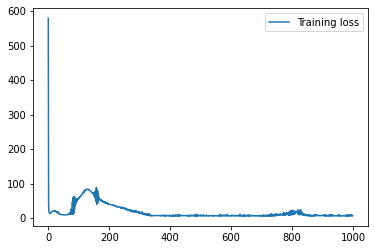

In [42]:
import matplotlib.pyplot as plt

plt.plot(losses, label='Training loss')
plt.legend()
plt.show()